# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

The dataset I chose to analyze is the TMDb movie data. The data contains information about 10,000 movies collected from the Movie Database, including revenue, budget, popularity, genres, etc. 

**Questions**: What correlations exists between numerical columns and revenue? How has the revenue changed over time?

<a id='wrangling'></a>
# Data Wrangling


In [1]:
#Import statements for necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data from csv file and display first five rows of dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#displays shape of dataframe
df.shape

(10866, 21)

In [4]:
#provide basic info of columns in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#show number of unique values for each column
df.nunique()


id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
#show summary statistics of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



# Data Cleaning

In [7]:
#Check for duplicated rows to drop
df.duplicated().sum()

1

In [8]:
#Drop duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
#Drop all rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [10]:
#Remove invalid/unreasonable data
errInd = df.query('runtime == 0 or budget == 0 or revenue == 0').index
df.drop(errInd, axis=0, inplace=True)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
# Exploratory Data Analysis

# Research Question 1: What correlations are there between numerical columns and revenue?

I analyze different correaltions between numerical columns (not including id) and movie revenue.

In [11]:
#Discover revenue stats
df.revenue.describe()

count    1.287000e+03
mean     1.762444e+08
std      2.538156e+08
min      4.300000e+01
25%      2.565097e+07
50%      8.208716e+07
75%      2.140694e+08
max      2.781506e+09
Name: revenue, dtype: float64

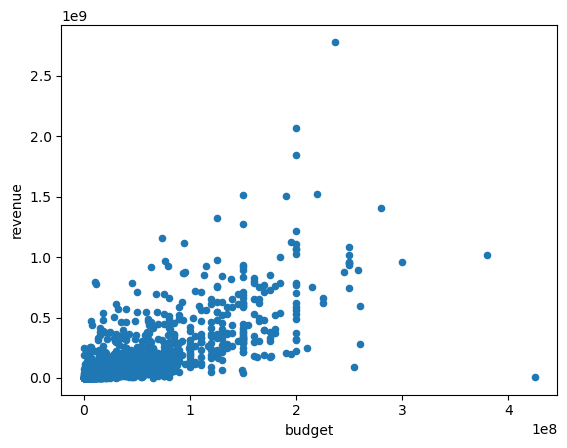

In [12]:
#Scatter plot of budget vs revenue
df.plot(x='budget', y='revenue', kind='scatter');


**Observation**: I notice that revenue seems to generally have a positive correlation. As budget increases, so does the revenue.

In [13]:
# Calculate the correlation between 'budget' and 'revenue'
df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.000000,0.706888
revenue,0.706888,1.000000


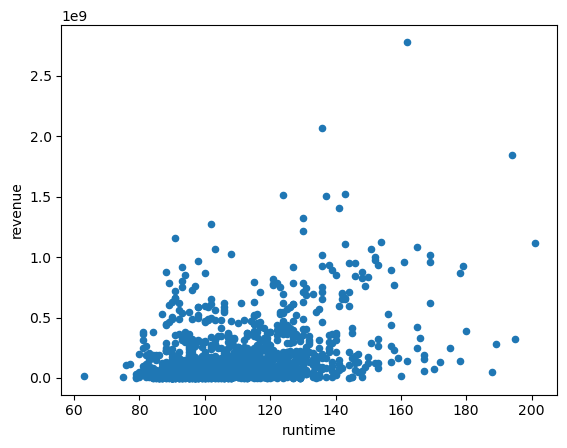

In [14]:
#Scatter plot of runtime vs revenue
df.plot(x='runtime', y='revenue', kind='scatter');

**Observation**: I observe that runtime and revenue do not have a clear correlation at all.

In [15]:
# Calculate the correlation between 'runtime' and 'revenue'
df[['runtime', 'revenue']].corr()

,runtime,revenue
runtime,1.000000,0.371226
revenue,0.371226,1.000000


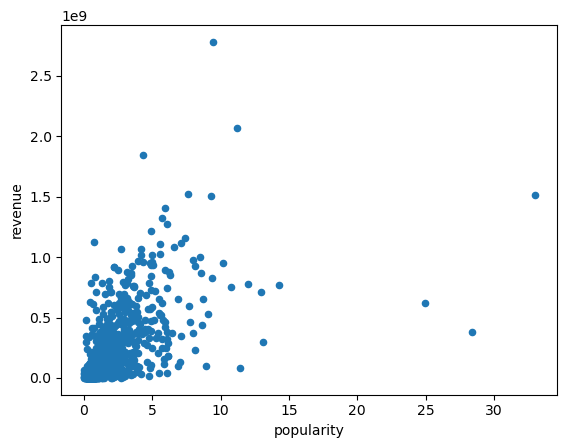

In [16]:
#Scatter plot between popularity and revenue
df.plot(x='popularity', y='revenue', kind='scatter');

I notice that for the most part, popularity is revenue is postively correlated with popularity

In [17]:
# Calculate the correlation between 'popularity' and 'revenue'
df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.000000,0.594755
revenue,0.594755,1.000000


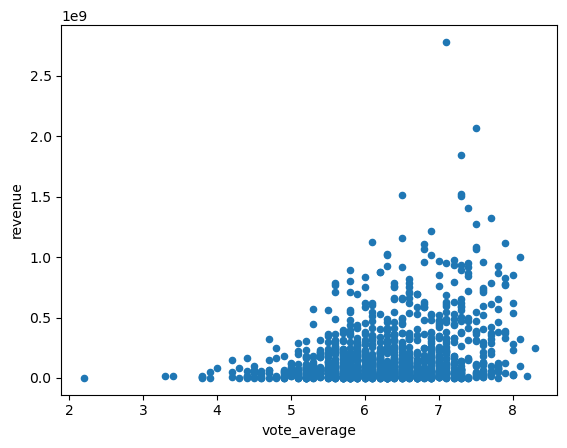

In [18]:
#Scatter plot between average vote and revenue
df.plot(x='vote_average', y='revenue', kind='scatter');

**Observation**:There is not a clear correlation between the average vote, and the revenue

In [19]:
# Calculate the correlation between 'average vote' and 'revenue'
df[['vote_average', 'revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.296501
revenue,0.296501,1.000000


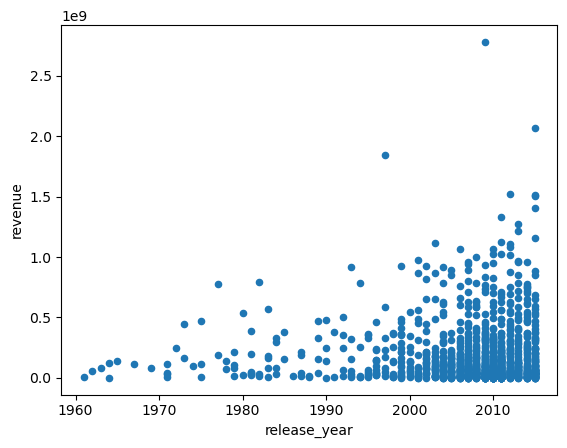

In [20]:
#Scatter plot between release year and revenue
df.plot(x='release_year', y='revenue', kind='scatter');

**Observation**:The correlation between revenue and year is not very strong. However, much more instances begin to appear as the years go on.

In [21]:
# Calculate the correlation between 'release year' and 'revenue'
df[['release_year', 'revenue']].corr()

,release_year,revenue
release_year,1.000000,0.028022
revenue,0.028022,1.000000


**Overall observations**: After analysis, I learn that there are two numerical columns have a relatively high positive correlation with film revenue. These two columns are budget (with a correlation of 0.70) and popularity (with a correlation of 0.59). I also learn that the release year has a very low correlation with film revenue, at 0.02. 

# Research Question 2: How does the revenue change over the years?

This is accomplished by utilizing the line char for change of revenue

In [22]:
revenues = df.groupby('release_year')['revenue'].mean()

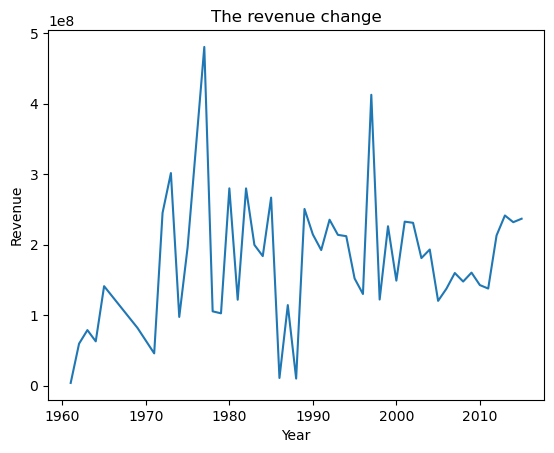

In [23]:
#plot the revenue change from year to year
plt.plot(revenues)
plt.title('The revenue change')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()


**Observation**: Based on the line chart, we can see that the revenue had drastic increases and decreases over the years. The revenue nose-dived in the early 1970s and mid 1980s and boomed in the mid 1970s and late 1990s. Overall, the revenue did not trend in a positive or negative direction.

<a id='conclusions'></a>
# Conclusions

For the first question, we learned that budget and popularity did have a positive correlation with film revenue, with both of them having a correlation above 0.50. We also learned that the year of release contained the weakest correlation to film revenue.
For the second question, we learned that while the revenue for films had drastic increases and decreases over the decades, it did not trend in a positive or negative direction overall. 
One limitation of the dataset was that a good chunk of the films had 0 budget, revenue, or runtime, forcing me to elminate these films from the dataset entirely. 
Another limitation was that there were multiple genres in each movie, forcing me to split the genres so that each genre was allocated to just 1 row.